In [159]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [160]:
# Loading the City of Cambridge's 2010 to 2013 accident report into a dataframe.
accidents = pd.DataFrame.from_csv('ACCIDENT-2010-2013.csv')

In [161]:
# Checking to see which streets have the highest rate of accidents.  It is not surprising that Mass Ave has the most due
# to the length of the street.
accidents['Steet Name'].value_counts()[:10]

Massachusetts Ave    1033
Cambridge St          418
Broadway              278
MOUNT AUBURN ST       251
Concord Ave           190
Hampshire St          156
GARDEN ST             128
PROSPECT ST           107
Alewife Brook Pky     104
Putnam Ave             96
Name: Steet Name, dtype: int64

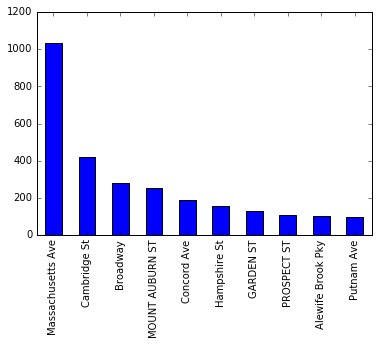

In [162]:
accidents_counts = accidents['Steet Name'].value_counts()
accidents_counts[:10].plot(kind='bar')

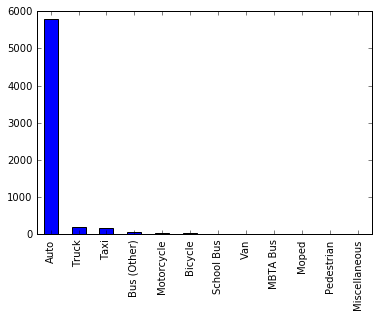

In [163]:
# Cars are the biggest cause of accidents.
accidents_counts = accidents['Object 1'].value_counts()
accidents_counts.plot(kind='bar')

In [164]:
# Filtering the dataframe by Mass Ave and Auto, so that I can determine what cars are crashing into.
is_massave = accidents['Steet Name'] == 'Massachusetts Ave'
is_auto = accidents['Object 1'] == 'Auto'
accidents_massave_auto = accidents[is_massave & is_auto]

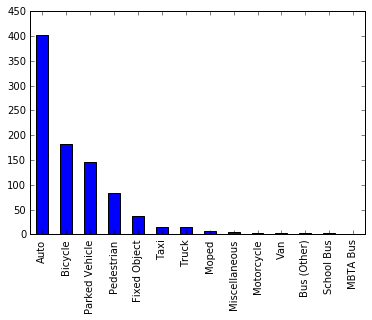

In [165]:
# From the cars traveling on Mass Ave, we can see that they usually have accidents with other cars.  The interesting
# thing is that Bicycle has the second highest rate of collision with Autos.
accidents_massave_auto['Object 2'].value_counts().plot(kind='bar')

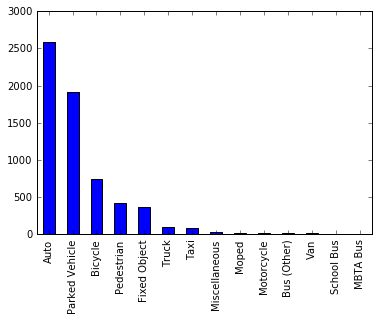

In [166]:
# In Cambridge it is more common for a car to crash into another car in motion or parked.  Crashing into a bicycle is a
# distant third place as the graph below shows.  What is it about Mass Ave that bicycles are more likely to be hit by a
# car?
accidents_counts = accidents['Object 2'].value_counts()
accidents_counts.plot(kind='bar')

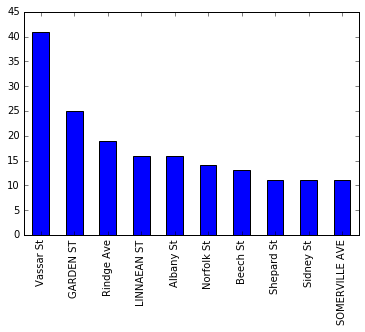

In [167]:
# Below are the top ten cross streets for auto accidents on Mass Ave in Cambridge regardless of what they are crashing into.
accidents_massave_auto['Cross Street'].value_counts()[:10].plot(kind='bar')

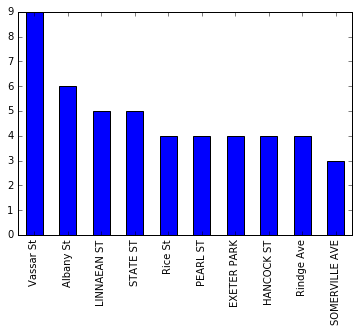

In [168]:
# Mass Ave cuts through two major universities: Harvard and MIT.  After plotting out the top ten cross streets where
# cars and bikes collide, we can see that the majority of bike accidents occur around Harvard's and MIT's campuses.  
is_bike = accidents_massave_auto['Object 2'] == 'Bicycle'
accidents_massave_auto_bike = accidents_massave_auto[is_bike]
accidents_massave_auto_bike['Cross Street'].value_counts()[:10].plot(kind='bar')

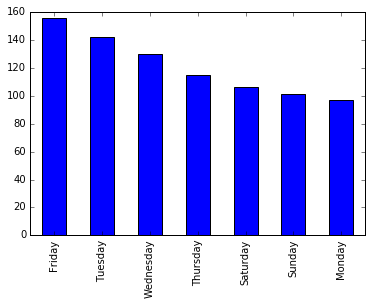

In [169]:
# When do most accidents occur?  Usually on Friday perhaps due to the rush to be home for the weekend.  
accidents_massave_auto['Day Of Week'].value_counts().plot(kind='bar')